# Read a grib file and make a contour plot of the data

In this example, we demonstrate:
1. How to read a grib file in Python using `xarray` 
2. How to make a contour plot of the data

## Data
We will read the ERA-Interim for geopotential height at 500hPa for Jan 6, 2010

The data are located on the COLA severs in the following directory:
```/shared/working/rean/era-interim/daily/data/2010/```

The filename is:
```ei.oper.an.pl.regn128cm.2010010600```

## Python import statements
You must first import the Python packages you wish to use. 
This is a common set of basic import statments you can start with.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Set the path and filename

In [2]:
path='/shared/working/rean/era-interim/daily/data/2010/'
fname='ei.oper.an.pl.regn128cm.2010010600'

Read the data using `xarray` `open_dataset` http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html

In [3]:
ds=xr.open_dataset(path+fname,engine='cfgrib',backend_kwargs={'indexpath': ''})

When you read in data using `xarray`, it creates an object called an `xarray.Dataset` which consists of your data and all its metadata. If we print out our `Dataset` which is called `ds`, its similar to doing a `ncdump -h` on a netcdf file. You can see all the dimensions, size, and attributes of the data in the file.

In [4]:
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    o3             (isobaricInhPa, latitude, longitude) float32 ...
    clwc           (isobaricInhPa, latitude, longitude) float32 ...
    ciwc           (isobaricInhPa, latitude, longitude) float32 ...
    cc             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-01-21T22:19:06 GRIB to CDM+CF via cfgrib-0....

If you want to access just the Geopotential Height, without all the other variables, you can do that by supplying the name of the variable

In [5]:
ds['z']

<xarray.DataArray 'z' (isobaricInhPa: 37, latitude: 256, longitude: 512)>
[4849664 values with dtype=float32]
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Attributes:
    GRIB_paramId:                             129
    GRIB_shortName:                           z
    GRIB_units:                               m**2 s**-2
    GRIB_name:                                Geopotential
    GRIB_cfName:                              geopotential
    GRIB_cfVarName:                           z
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      131072
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    GRIB_gridDefinitionDescription:           Gaussian Latitude/Longitude Grid
    GRIB_Nx:                                  512
    GRIB_iDirectionIncrementInDegrees:        0.703
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.297
    GRIB_N:                                   128
    GRIB_Ny:                                  256
    long_name:                                Geopotential
    units:                                    m**2 s**-2
    standard_name:                            geopotential

We can also use `xarray` to select only the 500 hPa level using the coordinate information rather than having to identify the array index.
This is done using the `xr.sel` method

In [6]:
ds_z500=ds.sel(isobaricInhPa=500)
ds_z500

<xarray.Dataset>
Dimensions:        (latitude: 256, longitude: 512)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  int64 500
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Data variables:
    pv             (latitude, longitude) float32 ...
    z              (latitude, longitude) float32 ...
    t              (latitude, longitude) float32 ...
    q              (latitude, longitude) float32 ...
    w              (latitude, longitude) float32 ...
    vo             (latitude, longitude) float32 ...
    d              (latitude, longitude) float32 ...
    r              (latitude, longitude) float32 ...
    o3             (latitude, longitude) float32 ...
    clwc           (latitude, longitude) float32 ...
    ciwc           (latitude, longitude) float32 ...
    cc             (latitude, longitude) float32 ...
    u              (latitude, longitude) float32 ...
    v              (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-01-21T22:19:06 GRIB to CDM+CF via cfgrib-0....

Let's make a very simple contour plot to convince ourselves that we indeed have geopotential height at 500 hPa. We will use the `matplotlib` `plt.contourf` function for a filled contour plot.  It works very similar to Matlab plotting functions.  

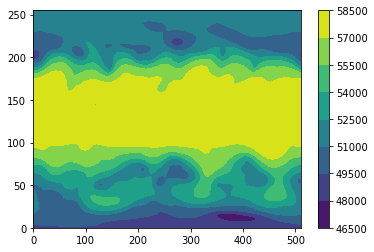

In [7]:
plt.contourf(ds_z500['z'])
plt.colorbar()

This is a very simple plot, but it looks like we have global 500 hPa geopotential height.  More details on how to plot maps, make nice lables, and colors, can be found in other examples.